## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\CF_CAPSTONE'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data','Prepared Data','King Data Clean.csv'))

In [5]:
df.shape

(21613, 25)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,...,0,1955,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650
1,1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,...,400,1951,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639
2,2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,...,0,1933,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062
3,3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,...,910,1965,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000
4,4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,...,0,1987,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503


In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0','Unnamed: 0.1','date','city','State'],axis = 1)

In [8]:
df.head()

,id,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98101,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98101,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98101,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.788312954188412e+23,
 -3.609376387296675e+22,
 -1.7743063097326717e+22,
 -9.890701007563157e+21,
 -6.523148119631811e+21,
 -3.919809620673464e+21,
 -2.9726780274708646e+21,
 -2.2251148792861255e+21,
 -1.7725271971448247e+21]

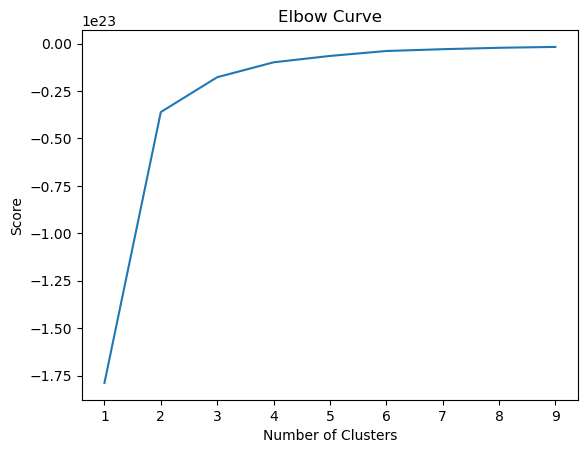

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,id,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98101,47.5112,-122.257,1340,5650,1
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98101,47.7210,-122.319,1690,7639,1
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98101,47.5208,-122.393,1360,5000,2
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [16]:
df['clusters'].value_counts()

1    7777
2    7011
0    6825
Name: clusters, dtype: int64

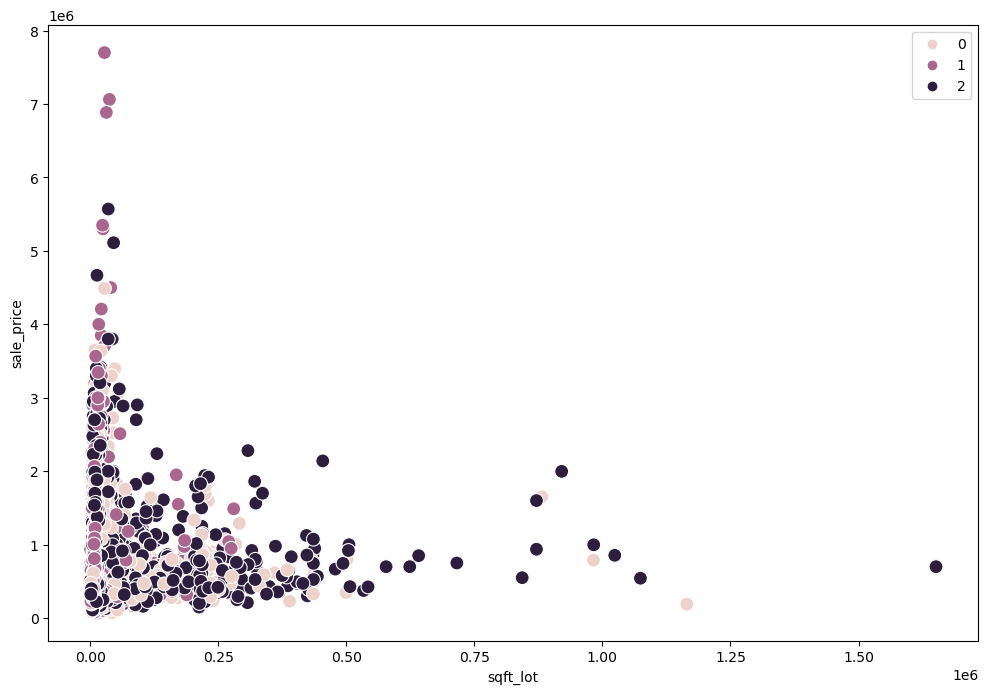

In [17]:
# Plot the clusters for the "sale_price" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_lot'], y=df['sale_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_lot') # Label x-axis.
plt.ylabel('sale_price') # Label y-axis.
plt.show()

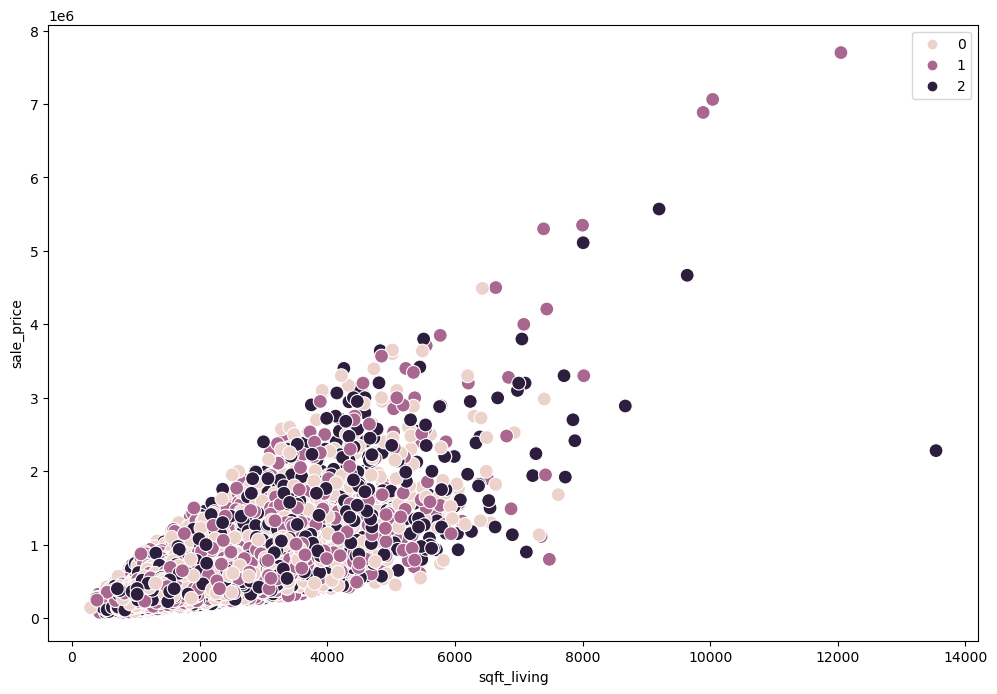

In [18]:
# Plot the clusters for the "sale_price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['sqft_living'], y=df['sale_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('sale_price') # Label y-axis.
plt.show()

In [1]:
# Export


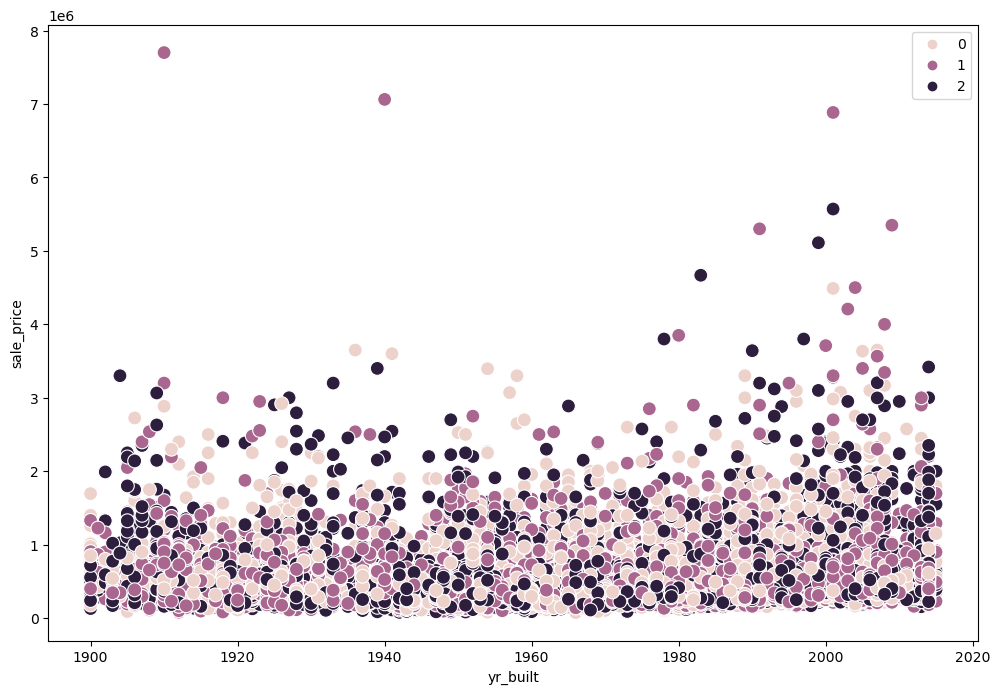

In [19]:
# Plot the clusters for the "yr_built" and "sale_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yr_built'], y=df['sale_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('yr_built') 
plt.ylabel('sale_price') 
plt.show()

## These charts tell us the following
## Chart 1: It seems that sale price and the sqft of the lot are not neccessarily important correlations
## Chart 2: it seems that sqft living IS and important correlation with sales price.
## Chart 3: It seems the newer the house the more likely the sales price will be higher even though there seems to be a fairly even distribution

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df.groupby('cluster').agg({'sqft_lot':['mean', 'median'], 
                         'yr_built':['mean', 'median'], 
                         'sqft_living':['mean', 'median'],
                          'sale_price':['mean', 'median']})

sqft_lot             yr_built          sqft_living          \
                     mean  median         mean  median         mean  median   
cluster                                                                       
dark purple  22731.367708  8138.0  1970.592925  1974.0  2118.297105  1940.0   
pink         13903.339341  7600.0  1970.327179  1972.0  2064.362344  1900.0   
purple        9289.826411  7204.0  1971.971711  1977.0  2058.919763  1910.0   

                sale_price            
                      mean    median  
cluster                               
dark purple  552933.505491  449000.0  
pink         539545.755311  450000.0  
purple       528983.981098  455000.0

#### As explained earlier, the data does suggest some insights unto to the relationship between the columns. However, the dark purple cluster returned best stats out of the clusters

##  The median number of variables is highest and significantly larger than the other two groupings. 

## This can be misleading as there may be other information about that cluster that leads it to perform.

#### This analysis has given more insight into the need to explore further the other categorical variables in dataframe and layer in additional data  in order to determine real estate investments
